<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CE%8C%CF%81%CE%B1%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_7_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Άσκηση 7, Ανίχνευση ακμών:**
 Θεωρήστε τις εικόνες αποχρώσεων του γκρι (grayscale
image) “butterfly_g.jpg”, “cameraman.bmp” και “lenna.bmp”.

**Ζητούμενα:**

**Ε.**Υπολογίστε για την εικόνα “butterfly_g.jpg” τις ακμές με χρήση των ακόλουθων μεθόδων που στηρίζονται στην χρήση πρώτων παραγώγων: Sobel, Roberts, Prewitt και Kirsch. Για τις μεθόδους των Sobel, Roberts και Prewitt να χρησιμοποιηθεί η μέθοδος καθολικής κατωφλίωσης του Otsu, ενώ για τη μέθοδο του Kirsch η βέλτιστη τιμή του κατωφλίου να προσδιοριστεί πειραματικά. Να αξιολογηθούν συγκριτικά ως προς την απόδοσή τους οι μέθοδοι.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Apply the Roberts Cross Operator

Combine the gradients

Normalize the gradient magnitude to the range [0, 255]

Define Prewitt kernels

In [ ]:
def sobel_edge_detection(image):
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    normalized_gradient = (gradient_magnitude * 255 / gradient_magnitude.max()).astype(np.uint8)
    return normalized_gradient

def roberts_edge_detection(image):
    roberts_kernel_x = np.array([[1, 0], [0, -1]])
    roberts_kernel_y = np.array([[0, 1], [-1, 0]])

    # Apply the Roberts Cross Operator
    gradient_x = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_y)

    # Combine the gradients
    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))

    # Normalize the gradient magnitude to the range [0, 255]
    normalized_gradient = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return normalized_gradient

def prewitt_edge_detection(image):
    # Define Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Convolve the image with the Prewitt kernels
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    # Compute the magnitude of the gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the gradient magnitude to the range [0, 255]
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

    # Convert the result to 8-bit unsigned integer
    gradient_magnitude = np.uint8(gradient_magnitude)

    return gradient_magnitude

def kirsch_edge_detection(image, masks):
    # Initialize an array to store the results
    result = np.zeros_like(image)

    # Apply Kirsch masks and find the maximum response
    for mask in masks:
        convolved = cv2.filter2D(image, cv2.CV_64F, mask)
        result = np.maximum(result, np.abs(convolved))

    # Normalize the result to the range [0, 255]
    result = ((result - np.min(result)) / (np.max(result) - np.min(result)) * 255).astype(np.uint8)

    return result


**Read an image**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
image = cv2.imread('/content/drive/My Drive/Υπολογιστική όραση/Dataset_01/butterfly_g.jpg')


Mounted at /content/drive


**Apply Sobel edge detection**

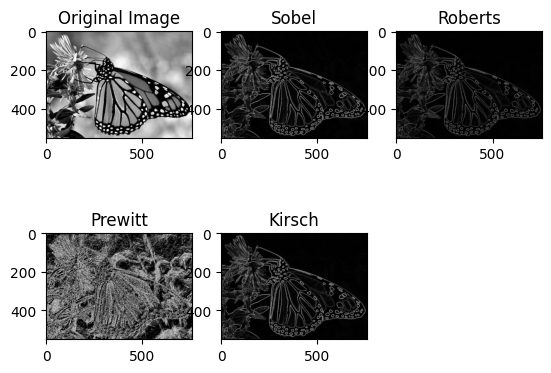

In [ ]:
sobel = sobel_edge_detection(image)
roberts = roberts_edge_detection(image)
prewitt = prewitt_edge_detection(image)

kirsch_masks = [
    np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
    np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
]
kirsch = kirsch_edge_detection(image, kirsch_masks)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(sobel)
plt.title('Sobel')

plt.subplot(2, 3, 3)
plt.imshow(roberts)
plt.title('Roberts')

plt.subplot(2, 3, 4)
plt.imshow(prewitt)
plt.title('Prewitt')

plt.subplot(2, 3, 5)
plt.imshow(kirsch)
plt.title('Kirsch')

plt.show()